In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [24]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu",
                      input_shape=(10000, )))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [9]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3704 - a

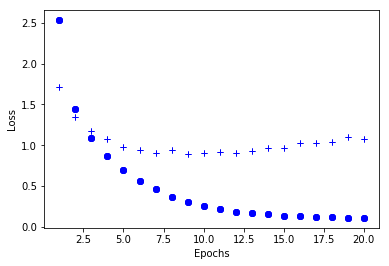

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, "b+")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu",
                      input_shape=(10000, )))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
          validation_data=(x_test, one_hot_test_labels))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s - loss: 2.6501 - acc: 0.5118 - val_loss: 1.7328 - val_acc: 0.6429
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 1.3938 - acc: 0.7004 - val_loss: 1.3124 - val_acc: 0.7199
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 1.0196 - acc: 0.7827 - val_loss: 1.1499 - val_acc: 0.7476
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.8005 - acc: 0.8303 - val_loss: 1.0721 - val_acc: 0.7640
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.6312 - acc: 0.8690 - val_loss: 1.0074 - val_acc: 0.7792
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.5038 - acc: 0.8945 - val_loss: 0.9648 - val_acc: 0.7858
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.4060 - acc: 0.9134 - val_loss: 0.9324 - val_acc: 0.7943
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.3277 - acc: 0.92